In [1]:
import re
import urllib  # the lib that handles the url stuff
import pandas as pd

%matplotlib inline

In [2]:
pd.__version__

'0.20.3'

Look for patterns like this:  
"data/nyct/turnstile/turnstile_180106.txt"

http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt

In [3]:
# Open file
f = open('mta_site.txt', 'r')
# Feed the file text into findall(); it returns a list of all the found strings
strings = re.findall(r'(data/nyct/turnstile/turnstile_\d+.txt)', f.read())
strings[:5]

['data/nyct/turnstile/turnstile_180113.txt',
 'data/nyct/turnstile/turnstile_180106.txt',
 'data/nyct/turnstile/turnstile_171230.txt',
 'data/nyct/turnstile/turnstile_171223.txt',
 'data/nyct/turnstile/turnstile_171216.txt']

In [4]:
url_prefix = 'http://web.mta.info/developers/'
urls = [url_prefix+string for string in strings]
urls[:5]

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180106.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_171230.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_171223.txt',
 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_171216.txt']

In [5]:
import io
import requests
url = urls[1]
f=requests.get(url).content
df=pd.read_csv(io.StringIO(f.decode('utf-8')))
df.head()
df = df.drop(['LINENAME','DIVISION'],axis=1)
df = df[df.DESC=='REGULAR'].drop('DESC',axis=1)
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,12/30/2017,03:00:00,6463109,2187558
1,A002,R051,02-00-00,59 ST,12/30/2017,07:00:00,6463119,2187567
2,A002,R051,02-00-00,59 ST,12/30/2017,11:00:00,6463178,2187654
3,A002,R051,02-00-00,59 ST,12/30/2017,15:00:00,6463373,2187736
4,A002,R051,02-00-00,59 ST,12/30/2017,19:00:00,6463712,2187803


In [6]:
df['weekday'] = pd.to_datetime(df['DATE']).dt.weekday_name
df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,weekday
0,A002,R051,02-00-00,59 ST,12/30/2017,03:00:00,6463109,2187558,Saturday
1,A002,R051,02-00-00,59 ST,12/30/2017,07:00:00,6463119,2187567,Saturday
2,A002,R051,02-00-00,59 ST,12/30/2017,11:00:00,6463178,2187654,Saturday
3,A002,R051,02-00-00,59 ST,12/30/2017,15:00:00,6463373,2187736,Saturday
4,A002,R051,02-00-00,59 ST,12/30/2017,19:00:00,6463712,2187803,Saturday


In [16]:
byStation = df.groupby(['STATION','DATE','C/A','UNIT','SCP']).agg(lambda x: x.max()-x.min())

In [8]:
df.head(20)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,weekday
0,A002,R051,02-00-00,59 ST,12/30/2017,03:00:00,6463109,2187558,Saturday
1,A002,R051,02-00-00,59 ST,12/30/2017,07:00:00,6463119,2187567,Saturday
2,A002,R051,02-00-00,59 ST,12/30/2017,11:00:00,6463178,2187654,Saturday
3,A002,R051,02-00-00,59 ST,12/30/2017,15:00:00,6463373,2187736,Saturday
4,A002,R051,02-00-00,59 ST,12/30/2017,19:00:00,6463712,2187803,Saturday
5,A002,R051,02-00-00,59 ST,12/30/2017,23:00:00,6463887,2187833,Saturday
6,A002,R051,02-00-00,59 ST,12/31/2017,03:00:00,6463926,2187844,Sunday
7,A002,R051,02-00-00,59 ST,12/31/2017,07:00:00,6463938,2187856,Sunday
8,A002,R051,02-00-00,59 ST,12/31/2017,11:00:00,6463980,2187919,Sunday
9,A002,R051,02-00-00,59 ST,12/31/2017,15:00:00,6464138,2187969,Sunday


In [21]:
byStation.groupby(['STATION','DATE']).sum()

ENTRIES  \
STATION         DATE                  
1 AV            01/01/2018     8427   
                01/02/2018    18668   
                01/03/2018    20417   
                01/04/2018    12010   
                01/05/2018    18891   
                12/30/2017    11867   
                12/31/2017    11544   
103 ST          01/01/2018    11233   
                01/02/2018    25615   
                01/03/2018    27806   
                01/04/2018    16192   
                01/05/2018    25708   
                12/30/2017    14603   
                12/31/2017    12624   
103 ST-CORONA   01/01/2018     6809   
                01/02/2018    16857   
                01/03/2018    17984   
                01/04/2018    11014   
                01/05/2018    17315   
                12/30/2017    12374   
                12/31/2017     9661   
104 ST          01/01/2018      831   
                01/02/2018     2961   
                01/03/2018     3143   
                01/04/2018     1611   
                01/05/2018     2695   
                12/30/2017     1354   
                12/31/2017     1034   
110 ST          01/01/2018     3986   
                01/02/2018    10238   
...                             ...   
WOODHAVEN BLVD  12/30/2017    14510   
                12/31/2017    11718   
WOODLAWN        01/01/2018     1893   
                01/02/2018     5957   
                01/03/2018     6428   
                01/04/2018     3070   
                01/05/2018     5280   
                12/30/2017     3220   
                12/31/2017     2363   
WORLD TRADE CTR 01/01/2018     6332   
                01/02/2018    17020   
                01/03/2018    17349   
                01/04/2018     9140   
                01/05/2018    14394   
                12/30/2017     6830   
                12/31/2017     7074   
YORK ST         01/01/2018     4126   
                01/02/2018     8700   
                01/03/2018     9759   
                01/04/2018     4810   
                01/05/2018     7927   
                12/30/2017     4155   
                12/31/2017     3515   
ZEREGA AV       01/01/2018      637   
                01/02/2018     2333   
                01/03/2018     2528   
                01/04/2018     1290   
                01/05/2018     2205   
                12/30/2017     1006   
                12/31/2017      830   

                            EXITS                                                                 
STATION         DATE                                                                              
1 AV            01/01/2018                                               9924                     
                01/02/2018                                              21328                     
                01/03/2018                                              22357                     
                01/04/2018                                              13472                     
                01/05/2018                                              21966                     
                12/30/2017                                              14291                     
                12/31/2017                                              14170                     
103 ST          01/01/2018                                               8290                     
                01/02/2018                                              16093                     
                01/03/2018                                              17179                     
                01/04/2018                                              11238                     
                01/05/2018                                              15849                     
                12/30/2017                                               8614                     
                12/31/2017                                               7898        

In [9]:
EntryBySta = byStation.median().sort_values('ENTRIES', ascending=False)
EntryBySta.head()

,,,,ENTRIES,EXITS
STATION,C/A,UNIT,SCP,,
14 ST,N078,R175,01-03-00,2.130150e+09,1.156845e+09
CHAMBERS ST,R116,R030,00-00-02,2.115331e+09,1.712374e+09
42 ST-PORT AUTH,N062,R011,01-00-01,2.032586e+09,1.691330e+09
59 ST,C021,R212,00-00-02,2.030520e+09,7.031500e+08
104 ST,J034,R007,00-00-02,2.026001e+09,6.221246e+08


(0, 100000000)

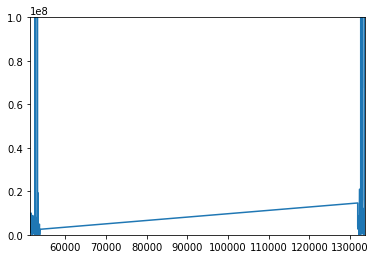

In [10]:
ax = df[df.STATION=='34 ST-PENN STA'].ENTRIES.plot()
ax.set_ylim([0,100000000])

In [11]:
byStation.median()

ENTRIES  \
STATION         C/A  UNIT SCP                      
1 AV            H007 R248 00-00-00  1.306901e+07   
                          00-00-01  5.819974e+07   
                          00-03-00  3.702006e+08   
                          00-03-01  2.091481e+06   
                          00-03-02  5.823548e+06   
                H008 R248 01-00-00  1.608210e+05   
                          01-00-01  2.421976e+06   
                          01-00-02  8.544728e+06   
                          01-00-03  9.542538e+08   
                          01-00-04  1.628199e+09   
103 ST          N037 R314 00-00-00  1.307510e+07   
                          00-00-01  1.002365e+07   
                          00-00-02  4.595023e+06   
                R170 R191 00-00-00  7.016075e+05   
                          00-00-01  1.245466e+07   
                          00-00-02  1.537130e+07   
                          00-03-00  7.713662e+06   
                          00-03-01  1.179765e+07   
                          00-03-02  1.049800e+07   
                R252 R180 00-00-00  3.555831e+07   
                          00-00-01  3.177320e+06   
                          00-00-02  1.359157e+07   
                          00-03-00  7.564050e+04   
                          00-03-01  1.190076e+06   
                          00-03-02  7.973775e+06   
103 ST-CORONA   R529 R208 00-00-00  1.477441e+07   
                          00-00-01  1.360326e+07   
                          00-00-02  1.525364e+06   
                          00-00-03  2.233410e+05   
                          00-00-04  3.998838e+06   
...                                          ...   
WOODLAWN        R294 R052 00-00-02  4.080255e+06   
                          00-00-03  5.671321e+06   
                          00-00-04  7.315879e+06   
WORLD TRADE CTR N094 R029 01-00-00  2.306500e+04   
                          01-00-01  1.726600e+04   
                          01-00-02  1.687500e+04   
                          01-00-03  1.891900e+04   
                          01-00-04  2.960350e+04   
                          01-03-00  1.736294e+06   
                          01-03-01  7.266480e+05   
                          01-03-02  5.401728e+06   
                          01-03-03  4.684947e+06   
                          01-03-04  1.524500e+04   
                          01-03-05  1.324800e+04   
                          01-03-06  1.579494e+09   
                          01-05-00  1.152000e+03   
                          01-05-01  0.000000e+00   
                          01-06-00  1.647100e+04   
                          01-06-01  2.167100e+04   
                          01-06-02  2.581800e+04   
                          01-06-03  2.560650e+04   
YORK ST         N530 R301 00-00-00  1.341247e+07   
                          00-00-01  1.375774e+07   
                          00-00-02  1.056496e+07   
ZEREGA AV       R419 R326 00-00-00  5.323616e+07   
                          00-00-01  2.846330e+05   
                          00-03-00  5.902010e+05   
                          00-03-01  2.934710e+05   
                          00-05-00  1.070000e+02   
                          00-05-01  3.900000e+01   

                                    EXITS                                                                 
STATION         C/A  UNIT SCP                                                                             
1 AV            H007 R248 00-00-00                                       1.457433e+07                     
                          00-00-01                                       3.695852e+07                     
                          00-03-00                                       3.871925e+08                     
                          00-03-01                                       8.770830e+05                     
                          00-03-02                                       4.886150e+05                     
               